# Scraped Lineups API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedLineupsAPI/Scraped%20Lineups%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Lineups API

The goal of Scraped Lineups API is to collect and return scraped lineups by the given filters. This can be done by using the `ScrapedLineupsAPI` class and calling appropriate methods


#### 1. Request by filters

Lineups can be retrieved for specific filters, by calling the `get_lineups` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`lineup_ids` List of LineupIDs

`imos` List of IMOs

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs

`received_date_from` Earliest date the lineup received

`received_date_to` Latest date the lineup received

`updated_date_from` Earliest date the lineup updated

`updated_date_to` Latest date the lineup updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by page token

Lineups can also be retrieved, by calling the `get_lineups_incremental` method.
This method will also return `next_request_token`, which the user should use to their next incremental request to retrieve only the latest updated cargoes.

#### Required

`vessel_type` The vessel type

#### Optional

`page_token` The key that should be used as a parameter of the token to retrieve the relevant page.

#### 3. Retrieve page token

The token referenced above can be retrieved for a specific date, by calling the `get_lineups_incremental_token` method with the following argument:
#### Required

`updated_date_from` Earliest date the lineup updated



### Additional optional arguments

Methods `get_lineups` and `get_lineups_incremental` also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_imo, scraped_deadweight, scraped_year_built, scraped_eta, scraped_etb, scraped_etd, scraped_location, scraped_quantity, scraped_cargo_type, scraped_api_gravity, scraped_origin, scraped_destination, scraped_supplier, scraped_charterer, scraped_buyer, scraped_port_agent
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
location_name, location_taxonomy, operation_type, cargo_type, cargo_group, origin_name, origin_taxonomy, destination_name, destination_taxonomy, supplier, charterer, buyer, port_agent, vessel_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content, subject
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_lineups import ScrapedLineupsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedLineupsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedLineupsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker lineups received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_lineups` method, as below

In [6]:
scraped_lineups = api.get_lineups(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_lineups), None)

ScrapedLineup(lineup_id=46348340, message_id=69973665, external_message_id=None, parsed_part_id=74958019, line_from=82, line_to=82, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 8, 2, 6, 26, 27, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 8, 2, 6, 24, 24, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='SUEZ PROTOPIA', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=9380893, vessel_name='Suez Protopia', deadweight=159999, year_built=2008, liquid_capacity=172092, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=85, vessel_class='Suezmax', commercial_operator_id=1597, commercial_operator='Stealth Maritime Corp', scraped_eta='02.08.2024', eta=datetime.datetime(2024, 8, 2, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb=None, etb=None, scraped_etd=None, etd=None, scraped_location='DARDANELLES', location_geo_id=7258, location_name='Dardanelles (WP)', location_taxono

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_lineups)

df.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,46348340,69973665,None,74958019,82,82,NaN,Email,2024-08-02 06:26:27+00:00,2024-08-02 06:24:24+00:00,...,None,None,None,None,NaN,None,TTA/ SUEZ PROTOPIA KOCAELI TALLIN 02.08.202...,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True
1,46348341,69973665,None,74958019,81,81,NaN,Email,2024-08-02 06:26:27+00:00,2024-08-02 06:24:24+00:00,...,None,None,None,None,NaN,None,TTA/ ADVANTAGE LOVE TUAPSE PORT SAID 02.08....,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True
2,46348342,69973665,None,74958019,62,62,NaN,Email,2024-08-02 06:26:27+00:00,2024-08-02 06:24:24+00:00,...,None,None,None,None,NaN,None,TTA/ AEGEAN NOBILITY JEDDAH NOVOROSSIYSK 02...,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True
3,46348343,69973665,None,74958019,83,83,NaN,Email,2024-08-02 06:26:27+00:00,2024-08-02 06:24:24+00:00,...,None,None,None,None,NaN,None,TTA/ AGIOS GERASIMOS NOVOROSSIYSK TRIESTE 0...,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True
4,46348344,69973665,None,74958019,60,60,NaN,Email,2024-08-02 06:26:27+00:00,2024-08-02 06:24:24+00:00,...,None,None,None,None,NaN,None,TTA/ VELOS AMBER UST LUGA ISTANBUL 02.08.20...,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True


#### Request by IMOs

To get lineups for specific vessel(s) by their IMO number(s), you can simple call the `get_lineups` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9380673,9359571,9377200,9383651,9287833]  # Or add a list of your desired IMOs

scraped_lineups_by_imos = api.get_lineups(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_lineups_by_imos)
df_by_imos.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,46350600,69990985,None,74968644,14,14,NaN,Email,2024-08-02 08:23:00+00:00,2024-08-02 08:21:37+00:00,...,None,ISS-AUGUSTA,None,None,None,None,01/08/2024 11:04\tCALAJUNCO M\tITA\t13671\tBRI...,Augusta and S.ta Panagia Bay daily situation,Nolarma,True
1,46350616,69990985,None,74968644,77,77,NaN,Email,2024-08-02 08:23:00+00:00,2024-08-02 08:21:37+00:00,...,None,ISS-AUGUSTA,None,None,None,None,01/08/2024 12:00\t25 Isab Nord\tCALAJUNCO M\tI...,Augusta and S.ta Panagia Bay daily situation,Nolarma,True
2,46350961,69991561,None,74968988,17,17,NaN,Email,2024-08-02 08:26:40+00:00,2024-08-02 08:26:06+00:00,...,None,None,None,None,None,None,calajunco m\tbrindisi\teni\t03/1500\ttbc\ttbc\...,TARANTO TANKER SITUATION -,Nolarma,True
3,46350963,69991561,None,74968988,9,9,1.0,Email,2024-08-02 08:26:40+00:00,2024-08-02 08:26:06+00:00,...,None,None,None,None,None,None,divina\tortona\teni 1\t02/0700\t02/0848\t03/12...,TARANTO TANKER SITUATION -,Nolarma,True
4,46350964,69991561,None,74968988,9,9,NaN,Email,2024-08-02 08:26:40+00:00,2024-08-02 08:26:06+00:00,...,None,None,None,None,None,None,divina\tortona\teni 1\t02/0700\t02/0848\t03/12...,TARANTO TANKER SITUATION -,Nolarma,True


#### Request by Message or ExternalMessage IDs

To retrieve lineups for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_lineups` method. This parameter should contain a list of message IDs. For instance,

In [9]:
message_ids = [69347177,69344714,69344260,69342271,69339979]
scraped_lineups_by_message_ids = api.get_lineups(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_lineups_by_message_ids), None)

ScrapedLineup(lineup_id=45619246, message_id=69339979, external_message_id=None, parsed_part_id=74531114, line_from=5, line_to=5, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 25, 7, 29, 5, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 25, 7, 27, 20, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='meltemi', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=-1, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=-1, vessel_type='Unknown', vessel_class_id=-1, vessel_class='Unknown', commercial_operator_id=None, commercial_operator=None, scraped_eta='20/07/2024', eta=datetime.datetime(2024, 7, 20, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb='25/07/2024', etb=datetime.datetime(2024, 7, 25, 0, 0, tzinfo=datetime.timezone.utc), scraped_etd='26/07/2024', etd=datetime.datetime(2024, 7, 26, 0, 0, tzinfo=datetime.timezone.utc), scrape

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Lineup IDs

In the same manner, to get data for specific lineup ID(s), you must call the `get_lineups` method for a list of desired lineup ID(s)

Date arguments are not available in this method

In [10]:
lineup_ids = [45618852,45621364,45619822,45619821,45619820]  # Or add a list of your desired lineup IDs

scraped_lineups_by_ids = api.get_lineups(
    vessel_type=vessel_type,
    lineup_ids=lineup_ids,
)

df_by_ids = pd.DataFrame(scraped_lineups_by_ids)
df_by_ids.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,45618852,69335109,None,74528225,81,81,None,Email,2024-07-25 07:07:11+00:00,2024-07-25 07:05:19+00:00,...,None,None,None,None,None,None,TTA/ NEW VISION KOCAELI ALIAGA 25.07.2024- ...,Turkish Straits Daily Report by Boutrosmar Ist...,Boutros Maritime & Transports,True
1,45619820,69344260,None,74533628,33,33,None,Email,2024-07-25 07:47:03+00:00,2024-07-25 07:45:21+00:00,...,None,None,None,None,None,None,\tvalle di granada\t\t\t\t\t27/1500\tload cpp,Milazzo daily situation,Nolarma,True
2,45619821,69344260,None,74533628,32,32,None,Email,2024-07-25 07:47:03+00:00,2024-07-25 07:45:21+00:00,...,None,None,None,None,None,None,\tred garnet\t\t\t\t\t26/0800\tload vgo,Milazzo daily situation,Nolarma,True
3,45619822,69344260,None,74533628,31,31,None,Email,2024-07-25 07:47:03+00:00,2024-07-25 07:45:21+00:00,...,None,None,None,None,None,None,\ttiger eye\t\t\t\t\t26/0800\tload cpp,Milazzo daily situation,Nolarma,True
4,45621364,69347177,None,74535337,19,19,None,Email,2024-07-25 07:59:13+00:00,2024-07-25 07:58:51+00:00,...,Saras,None,None,None,None,None,ohio\t\t30/1900\t\t\t\tceyhan\tdisch\tcrude oi...,Sarroch daily situation -,Nolarma,True


#### Retrieve incremental token
The `get_lineups_incremental_token` allows retrieval of `page_token` by adding the `updated_date_from` value.
This `page_token` can be used as a variable to the `get_lineups_incremental` method, in order to retrieve only new or updated lineups.


For instance, to retrieve the relevant page token for last week's data, you must call the `get_lineups_incremental_token`, as below

In [11]:
updated_date_from = datetime.utcnow() - timedelta(days=7)
page_token = api.get_lineups_incremental_token(
    updated_date_from=updated_date_from,
)

page_token

'MjAyNC0wNy0yNlQwODo0MjoyNi4wMDBa'

#### Request by page token

If the `page_token` parameter is not specified, the `get_lineups_incremental` method will retrieve all lineups. You can call the `get_lineups_incremental` method, as below



In [12]:
scraped_lineups_incremental = api.get_lineups_incremental(
    vessel_type=vessel_type,
    page_token=page_token,
)

df_by_ids = pd.DataFrame(scraped_lineups_incremental.data)
df_by_ids.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,45726016,69455361,None,74607744,23,23,NaN,Email,2024-07-26 09:28:49+00:00,2024-07-26 09:27:55+00:00,...,None,None,None,None,1.0,Expected,\tWHITE STAR\tGIBILTERRA\tENI\t27/0200\tTBC\tT...,CAMBIASO RISSO - DAILY PORT SITUATION,Cambiaso Risso Group,True
1,45726017,69455361,None,74607746,24,24,NaN,Email,2024-07-26 09:28:49+00:00,2024-07-26 09:27:55+00:00,...,None,None,None,None,3.0,AtAnchor,25/2000\tSYN ZUBE\tITA\t3827\tNEMRUT\tL\t2000\...,CAMBIASO RISSO - DAILY PORT SITUATION,Cambiaso Risso Group,True
2,45726018,69455361,None,74607746,34,34,NaN,Email,2024-07-26 09:28:49+00:00,2024-07-26 09:27:55+00:00,...,None,None,None,None,1.0,Expected,28/0700\tLADY\tITA\t24494\tLIVORNO\t\t\t\t,CAMBIASO RISSO - DAILY PORT SITUATION,Cambiaso Risso Group,True
3,45726019,69455361,None,74607743,3,3,NaN,Email,2024-07-26 09:28:49+00:00,2024-07-26 09:27:55+00:00,...,None,None,None,None,4.0,AtBerth,"ORIENTAL TULIP\tAT BERTH\t23/07 14,36\t26/07 P...",CAMBIASO RISSO - DAILY PORT SITUATION,Cambiaso Risso Group,True
4,45726020,69455361,None,74607743,4,4,NaN,Email,2024-07-26 09:28:49+00:00,2024-07-26 09:27:55+00:00,...,None,None,None,None,4.0,AtBerth,"SUPERBA\tAT BERTH\t23/07 13,18\t28/07 P.M.\tEL...",CAMBIASO RISSO - DAILY PORT SITUATION,Cambiaso Risso Group,True


Also, the `get_lineups_incremental` method will retrieve the `next_request_token`, which should be used as the `page_token` for the next incremental call and retrieve only new or updated lineups.

In [13]:
next_request_token = scraped_lineups_incremental.next_request_token

next_request_token

'MjAyNC0wOC0wMlQwODo0MjoyNi43NDNa'

#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [14]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_location',
    'location_name',
    'scraped_origin',
    'origin_name',
    'scraped_cargo_type',
    'cargo_type',
    'scraped_quantity',
    'quantity',
]

scraped_mapped_df = pd.DataFrame(scraped_lineups, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_location,location_name,scraped_origin,origin_name,scraped_cargo_type,cargo_type,scraped_quantity,quantity
0,SUEZ PROTOPIA,Suez Protopia,DARDANELLES,Dardanelles (WP),KOCAELI,None,None,None,None,NaN
1,ADVANTAGE LOVE,Advantage Love,DARDANELLES,Dardanelles (WP),TUAPSE,Tuapse,None,None,None,NaN
2,AEGEAN NOBILITY,Aegean Nobility,BOSPHORUS,Bosphorus,JEDDAH,Jeddah,None,None,None,NaN
3,AGIOS GERASIMOS,Agios Gerasimos,DARDANELLES,Dardanelles (WP),NOVOROSSIYSK,Novorossiysk,None,None,None,NaN
4,VELOS AMBER,Velos Amber,BOSPHORUS,Bosphorus,UST LUGA,Ust-Luga,None,None,None,NaN


## Examples

Let's start by fetching all tanker lineups received the last week

In [15]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_lineups = api.get_lineups(
    vessel_type=example_vessel_type,
    received_date_from=example_date_from,
)

#### Exclude deleted scraped lineups

The `is_deleted` property of a scraped lineup indicates whether it is valid or not. If it is set to `True`, the corresponding `lineup_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped lineups in the following examples.

In [16]:
example_scraped_lineups = [lineup for lineup in example_scraped_lineups if not lineup.is_deleted]

next(iter(example_scraped_lineups), None)

ScrapedLineup(lineup_id=45726016, message_id=69455361, external_message_id=None, parsed_part_id=74607744, line_from=23, line_to=23, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 26, 9, 28, 49, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 26, 9, 27, 55, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='WHITE STAR', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=-1, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=-1, vessel_type='Unknown', vessel_class_id=-1, vessel_class='Unknown', commercial_operator_id=None, commercial_operator=None, scraped_eta='27/0200', eta=datetime.datetime(2024, 7, 27, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb='TBC', etb=None, scraped_etd='TBC', etd=None, scraped_location='TARANTO', location_geo_id=3564, location_name='Taranto', location_taxonomy_id=2, location_taxonomy='Port', operation_type_i

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [17]:
example_columns = [
    'imo',
    'location_name',   
    'operation_type',
    'eta',
    'quantity',
    'is_deleted'
]

data = pd.DataFrame(example_scraped_lineups, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,location_name,operation_type,eta,quantity,is_deleted
0,-1,Taranto,Load,2024-07-27 00:00:00+00:00,5500.0,False
1,-1,Raffineria Di Milazzo,Load,2024-07-25 00:00:00+00:00,2000.0,False
2,-1,Raffineria Di Milazzo,Discharge,2024-07-28 00:00:00+00:00,NaN,False
3,9890549,Genoa,Load,2024-07-23 00:00:00+00:00,12000.0,False
4,9538165,Genoa,None,2024-07-23 00:00:00+00:00,30000.0,False


#### Top 10 Ports

In this example, we will find the top 10 Ports, based on the number of distinct operations

In [18]:
top_ports = data[data.operation_type.notna()]\
    [['location_name', 'imo', 'operation_type']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head(10)\
    .index\
    .tolist()

top_ports_df = data[data.location_name.isin(top_ports)]

top_ports_pivot = pd.pivot_table(
    top_ports_df,
    index='location_name',
    columns='operation_type',
    values='imo',
    aggfunc=lambda x: len(x.unique()),
    fill_value=0,
    dropna=False,
).reset_index().rename_axis(None, axis=1)

top_ports_pivot.index = top_ports_pivot.location_name

top_ports_pivot  = top_ports_pivot.loc[top_ports].reset_index(drop=True)
top_ports_pivot

,location_name,Discharge,Load,Unknown,Waypoint
0,Sikka,30,22,0,0
1,Ceyhan,0,44,0,0
2,Hodeidah,36,1,0,0
3,Basrah,10,17,0,0
4,Aden,17,3,0,6
5,Sarroch,8,17,1,0
6,Mumbai,18,5,0,0
7,Vadinar,18,4,0,0
8,Dardanelles (WP),0,0,0,20
9,Trieste,18,0,0,0


And display results in a stacked bar plot

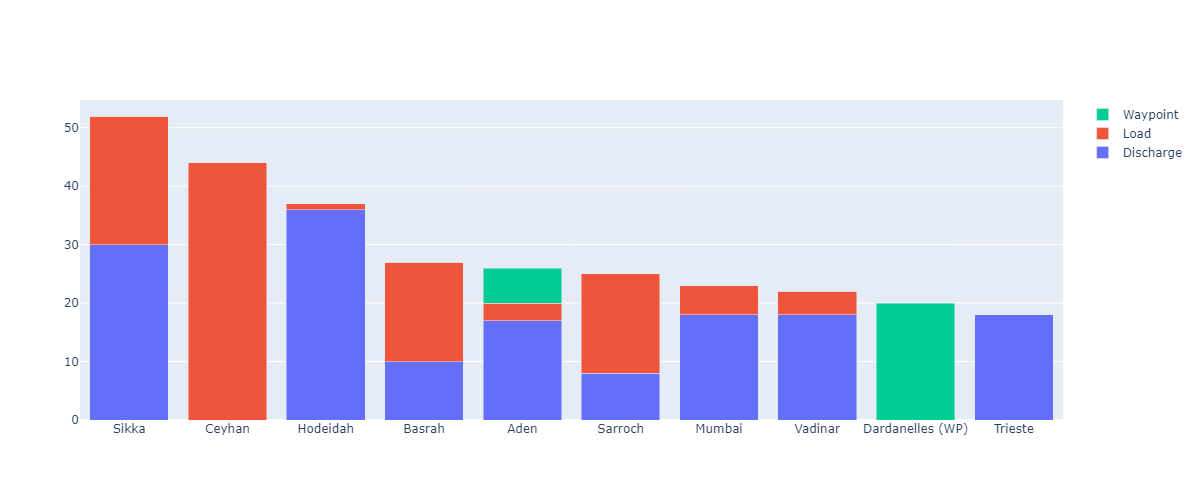

In [19]:
ports_list = top_ports_pivot.location_name.tolist()

disch_bar = 'Discharge' in top_ports_pivot and go.Bar(
    name='Discharge',
    x=ports_list,
    y=top_ports_pivot.Discharge.tolist(),
)
load_bar = 'Load' in top_ports_pivot and go.Bar(
    name='Load',
    x=ports_list,
    y=top_ports_pivot.Load.tolist(),
)
waypoint_bar = 'Waypoint' in top_ports_pivot and go.Bar(
    name='Waypoint',
    x=ports_list,
    y=top_ports_pivot.Waypoint.tolist(),
)
fig_data = list(filter(
    lambda x: x,
    [disch_bar, load_bar, waypoint_bar]
))

fig = go.Figure(data=fig_data)

fig.update_layout(barmode='stack')
fig.show()

#### Imported quantity in specific ports

In this example, we will create a visualization, for the total cargo quantity discharging in specifc ports per day over the next week

In [20]:
ports = data[data.operation_type == 'Discharge'][['imo', 'location_name']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head()\
    .index\
    .tolist()

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

ports

['Hodeidah', 'Sikka', 'Trieste', 'Mumbai', 'Vadinar']

Create the pivot table

In [21]:
exports_mask = data.location_name.isin(ports) & (data.operation_type == 'Discharge')

df_exports = data[exports_mask][['eta', 'location_name', 'quantity', 'imo']].drop_duplicates()

df_pivot = pd\
    .pivot_table(
        df_exports,
        columns='location_name',
        index='eta',
        values='quantity',
        aggfunc=sum,
        fill_value=0,
    )\
    .reindex(index=this_week_days, fill_value=0)\
    .reset_index()\
    .rename(columns={'index': 'eta'})\
    .rename_axis(None, axis=1)

df_pivot

,eta,Hodeidah,Mumbai,Sikka,Trieste,Vadinar
0,2024-08-02 00:00:00+00:00,0,11700,153000,209932,278000
1,2024-08-03 00:00:00+00:00,0,0,532302,264951,1015201
2,2024-08-04 00:00:00+00:00,0,0,332308,187887,0
3,2024-08-05 00:00:00+00:00,0,0,100000,425414,0
4,2024-08-06 00:00:00+00:00,0,29000,0,137357,0
5,2024-08-07 00:00:00+00:00,0,0,200000,0,0
6,2024-08-08 00:00:00+00:00,0,0,0,0,0


And display the results as timeseries

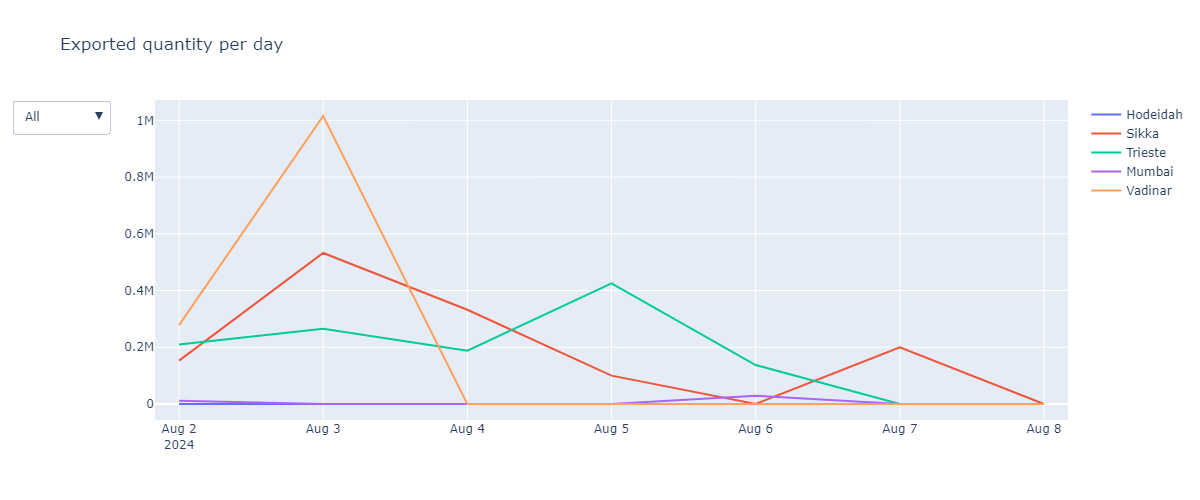

In [22]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Exported quantity in {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=port,
        method='update',
        args=args,
    )

title = 'Exported quantity per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x=df_pivot.eta,
        y=df_pivot[port],
        name=port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [23]:
output_path = '' # Change output_path with your path
filename = 'last_week_lineups.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)